<a href="https://colab.research.google.com/github/hammaad2002/Kalman-Filter/blob/main/Kalman_Boiiiiiiiiii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kalmann_new.xlsx to kalmann_new.xlsx


In [3]:
import pandas as pd
import io
df = pd.read_excel("kalmann_new.xlsx")
df = df.values.tolist()

In [4]:
df

[[0.6283575319343231, 0.586946326521553],
 [0.628846776913043, 0.5889141300910427],
 [0.6293592133972749, 0.5909045469645217],
 [0.6299059615692655, 0.5929284487207862],
 [0.6304976094863551, 0.5949963172245847],
 [0.6311440442700219, 0.597118123056761],
 [0.6318542898774688, 0.5993032084083816],
 [0.6326363530296342, 0.6015601754680246],
 [0.6334970787426574, 0.6038967812253956],
 [0.6344420169370206, 0.6063198396706224],
 [0.6354753013455824, 0.6088351321410891],
 [0.6365995420640115, 0.6114473267221818],
 [0.6378157327623082, 0.6141599073240612],
 [0.6391231736746934, 0.6169751131880092],
 [0.6405194111427198, 0.6198938892875818],
 [0.6420001945737789, 0.6229158482081492],
 [0.6435594513772005, 0.6260392438538356],
 [0.6451892803920933, 0.6292609573204065],
 [0.6468799641208706, 0.6325764951298883],
 [0.6486199999992797, 0.6359799999992128],
 [0.650811529789789, 0.6396559908001851],
 [0.6530165521233358, 0.6434006405630818],
 [0.6552097674553252, 0.6472001219843964],
 [0.65736465604

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class Filter:
    def __init__(self, filter=None):
        self.filter = filter
        self.filter.predict()

    def get_point(self):
        return self.filter.x[0:2, :].flatten()

    def predict_point(self, measurement):
        self.filter.update(measurement)
        self.filter.predict()
        #print self.filter.x
        return self.get_point()

class KalmanFilter(Filter):
    def __init__(self, sigma, dT):
        """
        Kalman Filter Constructor
        
        Algorithms:
            X: state matrix [[ x ],
                             [ y ],
                             [ x_velocity ],
                             [ y_velocity ],
                             [ x_acceleration ],
                             [ y_acceleration ]]
            << State Transition >>
                x <- x + x_velocity
                y <- y + y_velocity
                x_velocity <- x_velocity + x_acceleration
                y_velocity <- y_velocity + y_acceleration
                x_acceleration <- x_acceleration
                y_acceleration <- y_acceleration
                
        Args:
        class KalmanFilter(Filter):
    def __init__(self, sigma, dT):
    ...
    self.f = np.array([[1, 0, dT, 0, dT*dT/2,   0],
                       [0, 1, 0, dT,   0, dT*dT/2],
                       [0, 0, 1, 0,   dT,   0],
                       [0, 0, 0, 1,   0,   dT],
                       [0, 0, 0, 0,   1,   0],
                       [0, 0, 0, 0,   0,   1]])
            sigma (float): measurement uncertainty
        """
        self.x = np.array([[0. for i in range(6)]]).reshape(-1, 1)
        self.f = np.array([[1, 0, dT, 0, dT*dT/2,   0],
                           [0, 1, 0, dT,   0, dT*dT/2],
                           [0, 0, 1, 0,   dT,   0],
                           [0, 0, 0, 1,   0,   dT],
                           [0, 0, 0, 0,   1,    0],
                           [0, 0, 0, 0,   0,    1]])
        self.p = np.diag([999. for i in range(6)])
        self.q = 0.001*self.f.dot(self.f.transpose())
        self.h = np.array([[1., 0., 0., 0., 0., 0.],
                           [0., 1., 0., 0., 0., 0.]])
        self.r = np.array([[sigma, 0.],
                           [0., sigma]])
        self.i = np.identity(6)

    def predict(self):
        """
        Prediction Step in Kalman Filter
        
        Algorithms:
            x = f*x
            p = f*p*f^T
        """
        
        self.x = self.f.dot(self.x)
        self.p = self.f.dot(self.p).dot(self.f.transpose()) + self.q

    def update(self, measurement):
        """
        Update Step in Kalman Filter.
        
        Algorithms:
            Z = measurement matrix (2x1)
            y = z - h * x (error between sensor measurement and predicted value)
            s = h * p * h^T + r
            k = p * h^T * s^-1 (kalman gain)
            x = x_real = x + k * y
            p = p_real = (I - k * h)*p       
                
        Args:
            measurement (list): [x, y] coordinates
        """

        z = np.array(measurement).reshape(-1, 1)
        y = z - self.h.dot(self.x)
        s = self.h.dot(self.p).dot(self.h.transpose()) + self.r
        k = self.p.dot(self.h.transpose()).dot(np.linalg.inv(s))

        self.x = self.x + k.dot(y)
        self.p = (self.i - k.dot(self.h)).dot(self.p)


class ExtendedKalmanFilter(Filter):
    def __init__(self, sigma):
        self.x = np.array([0.,  #x
                           0.,  #y
                           0.,  # heading
                           0.,  # rotation
                           0.]).reshape(-1, 1) # distance

        self.p = np.diag([999 for i in range(5)])
        self.h = np.array([[1., 0., 0., 0., 0.],
                           [0., 1., 0., 0., 0.]])

        self.r = np.diag([sigma, sigma])
    def get_state_transition_matrix(self):
        x, y, h, r, d = self.x
        return np.array([
                [1, 0, -d*np.cos(h) + d*np.cos(r + h), d*np.cos(r + h), -np.sin(h) + np.sin(h + r)],
                [0, 1, -d*np.sin(h) - d*np.sin(r - h), d*np.sin(r - h), np.cos(h) - np.cos(h - r)],
                [0, 0,                                   1,                   1, 0],
                [0, 0,                                   0,                   1, 0],
                [0, 0,           0, 0, 1]])



    def predict(self):
        f = self.get_state_transition_matrix()
        x, y, h, r, d = self.x

        new_x = x - d * np.sin(h) + d * np.sin(h + r)
        new_y = y + d * np.cos(h) - d * np.cos(h - r)
        new_h = h + r
        new_r = r
        new_d = d

        self.x = np.array([new_x, new_y, new_h, new_r, new_d]).reshape(-1, 1)
        self.x += np.array([1e-7 for i in range(5)]).reshape(-1, 1)
        self.p = f.dot(self.p).dot(f.transpose())


    def update(self, measurement):
        z = np.array(measurement).reshape(-1, 1)
        y = z - self.h.dot(self.x)

        s = self.h.dot(self.p).dot(self.h.transpose()) + self.r
        k = self.p.dot(self.h.transpose()).dot(np.linalg.inv(s))

        self.x = self.x + k.dot(y)
        self.p = (np.eye(5) - k.dot(self.h)).dot(self.p)


def create_function_data(function, range_list, noise=0.0):
    measurements = []
    x = range_list
    y = function(x) + np.random.rand(len(x)) * noise
    measurements += [[x,y] for x, y in zip(x, y)]
    return measurements


def get_dist(pointA, pointB):
    """
    Returns
        float: distance between two points (to calculate distance between real and predicted positions)
    """
    a, b = pointA
    c, d = pointB

    return np.sqrt((a-c)**2 + (b - d)**2)

def action(filter, measurements):
    err_list = []
    result = []

    for i in range(len(measurements)):
        m = measurements[i]
        pred = filter.predict_point(m)
        err = get_dist(m, pred)
        #print("error: {}".format(err))
        err_list.append(err)
        result.append(pred)

    return result, err_list

def plot(measurements, result, err_list, radius):
    plt.figure("Kalman Filter Visualization")
    plt.subplot(211)
    plt.plot([x[0] for x in measurements], [x[1] for x in measurements], c='red', label='Real Position', alpha=0.3)
    plt.plot([x[0] for x in result], [x[1] for x in result], c='blue', label='Predicted Position', alpha=0.3)
    plt.legend()
    plt.grid('on')
    plt.title("Circular Motion Robot and Kalman Filter Prediction")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    #plt.xlim(-radius, radius)
    #plt.ylim(-radius, radius)

    plt.subplot(212)
    plt.plot(err_list, lw=0.1, c='blue', linewidth='2')
    plt.grid('on')
    plt.title("Error MSE(True Position - Predicted Position)")
    plt.xlabel("Iteration")

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    EKF = ExtendedKalmanFilter(sigma=0.00001)
    KF = KalmanFilter(sigma=1,dT=0.1)


    filter = Filter(EKF)
    filter = Filter(KF)
    options = {
        'step_size': 0.1,
        'radius': 40,
        'N': 1,
    }

    
    result, err_list = action(filter, df)
    # measurements = create_function_data(np.sin, np.arange(-10, 10, 0.001), noise=0.1)
    # result, err_list = action(filter, measurements)
    # plot(measurements, result, err_list, radius = 20)

<ipython-input-12-1df2a951a30c>:117: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([


<ipython-input-12-1df2a951a30c>:198: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.plot(err_list, lw=0.1, c='blue', linewidth='2')


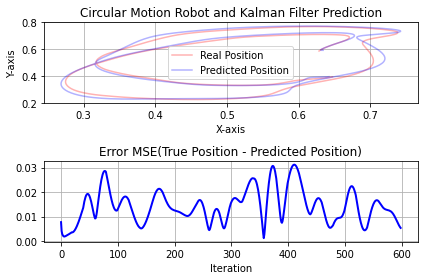

In [13]:
plot(df, result, err_list, radius = options['radius']*2)

In [14]:
def create_artificial_circle_data(step_size, radius, N):
    # sin graph
    # x = np.arange(-radius, radius*N, step_size)
    # y = np.sin(x) + np.random.randn(len(x)) * 0.1
    # measurements += [[x,y] for x, y in zip(x, y)]

    # circle
    # upper half
    measurements = []
    x = np.arange(-radius, radius, step_size)
    y = np.sqrt(radius**2 - x**2) + np.random.randn(len(x)) # add noise
    measurements += [[x,y] for x, y in zip(x, y)]
    # circle lower half
    x = np.arange(radius, -radius, -step_size)
    y = -np.sqrt(radius**2 - x**2) + np.random.randn(len(x)) # add noise
    measurements += [[x,y] for x, y in zip(x, y)]
    # how many circle
    measurements *= N
    return measurements
measurements = create_artificial_circle_data(**options)

In [15]:
measurements

[[-40.0, -0.25027988507788784],
 [-39.9, 1.655570317594846],
 [-39.8, 3.5652787012111236],
 [-39.699999999999996, 5.013748027910327],
 [-39.599999999999994, 5.713133800915712],
 [-39.49999999999999, 6.982680865866871],
 [-39.39999999999999, 6.793692029599958],
 [-39.29999999999999, 8.442569198430508],
 [-39.19999999999999, 8.129762734407059],
 [-39.09999999999999, 8.565502043234694],
 [-38.999999999999986, 6.8287781217931],
 [-38.899999999999984, 10.177379083526569],
 [-38.79999999999998, 8.976267109796868],
 [-38.69999999999998, 9.486083042977024],
 [-38.59999999999998, 10.993246825213786],
 [-38.49999999999998, 13.351266279455256],
 [-38.39999999999998, 9.095956303744757],
 [-38.299999999999976, 11.403874984014566],
 [-38.199999999999974, 11.780156051019521],
 [-38.09999999999997, 12.86624332360756],
 [-37.99999999999997, 10.717275795822706],
 [-37.89999999999997, 12.774143352102596],
 [-37.79999999999997, 14.541045296531319],
 [-37.69999999999997, 13.325383896780917],
 [-37.59999999